## Function to plot the learning curves of a machine learning Model

In [1]:
# Import Required Library
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curves (model, X, y, title="Learning Curve"):
    # Split Training and test data in 1:4
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[: m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    #Plotting Learning Curve
    plt.figure(figsize=(8, 5))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training Data")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation Data")
    plt.title(title)
    
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("Root Mean Square Error", fontsize=14)

### Ploting Learning Curve Using Above Function

In [2]:
# Import Required Library
import numpy as np

# Generate non-linear data with noise
m = 100 # Number of training examples
X = 7 * np.random.rand(m, 1) - 4
y = 2*X + 4 + np.random.randn(m, 1)

In [3]:
# Import Linear Regression Library
from sklearn.linear_model import LinearRegression

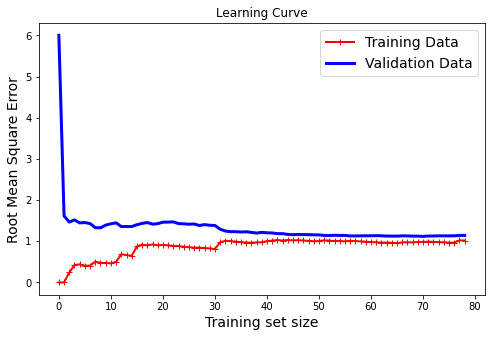

In [4]:
lr = LinearRegression()
plot_learning_curves(lr, X, y)

### Example of Learning Curve that detects Overfitting Issue

In [18]:
# Generate non-linear data with noise
X_2 = 7 * np.random.rand(20, 1) - 1
y_2 = 2 * X_2**2 + 0.5*X_2 + 4 + np.random.randn(20, 1)

In [19]:
from sklearn.linear_model import LinearRegression # Import Linear Regression Library
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


# Define pipeline for Polynomial Regression
polynomial_regression = Pipeline([("poly_feature", PolynomialFeatures(degree=10, include_bias=False)), 
                                ("lr", LinearRegression())])

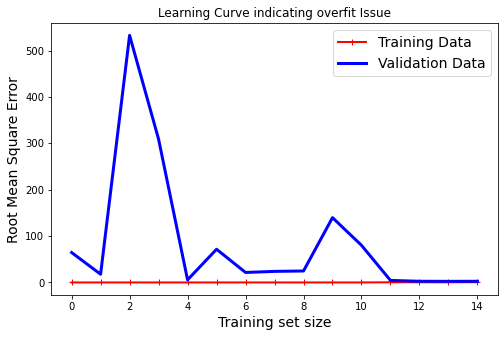

In [20]:
# Plotting the Learning Curve
plot_learning_curves(polynomial_regression, X_2, y_2, "Learning Curve indicating overfit Issue") 

### Example of Learning Curve that detects Underfitting Issue

In [12]:
# Generate non-linear data with with 3 degree polynomial and noise
X_3 = 7 * np.random.rand(20, 1) - 1
y_3 = X_3**3 + 2 * X_3**2 + 0.5*X_3 + 4 + np.random.randn(20, 1)

In [13]:
# Define pipeline for Polynomial Regression
polynomial_regression = Pipeline([("poly_feature", PolynomialFeatures(degree=1, include_bias=False)), 
                                ("lr", LinearRegression())])

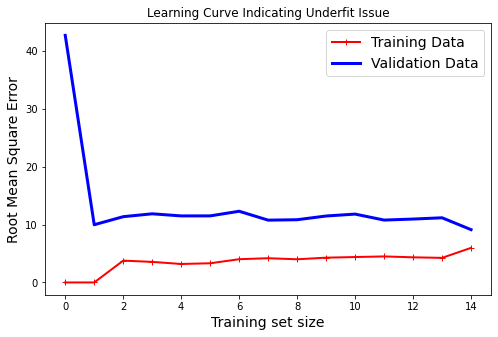

In [17]:
# Plotting the Learning Curve
plot_learning_curves(polynomial_regression, X_2, y_2, "Learning Curve Indicating Underfit Issue")

### Example of Learning Curve without any issue

In [10]:
# Define pipeline for Polynomial Regression
polynomial_regression = Pipeline([("poly_feature", PolynomialFeatures(degree=2, include_bias=False)), 
                                ("lr", LinearRegression())])

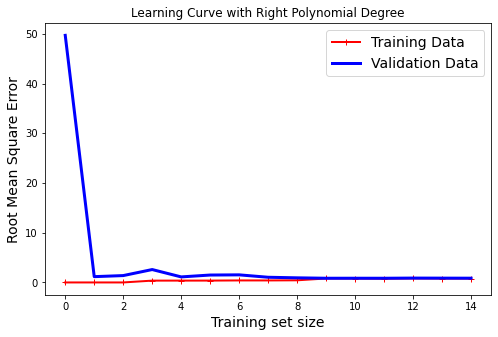

In [11]:
# Plotting the Learning Curve
plot_learning_curves(polynomial_regression, X_2, y_2, "Learning Curve with Right Polynomial Degree")